In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# change to add axis and return figure instead of plotting inside the function so that we can add the iterates
def plot_problem(problem): # 2x2
  P = problem['P']
  q = problem['q']
  A = problem['A']
  b = problem['b']
  assert(P.shape == (2,2))
  assert(q.shape == (2,1))
  assert(A.shape[1] == 2)
  assert(b.shape[0] == A.shape[0])
  assert(b.shape[1] == 1)
  
  x1_low = 0
  x1_high = 5
  x2_low = 0
  x2_high = 5

  fig = plt.figure()

  x1 = np.linspace(x1_low, x1_high, (x1_high-x1_low)*50 + 1)
  x2 = np.linspace(x2_low, x2_high, (x2_high - x2_low)*50 +1)
  x1, x2 = np.meshgrid(x1, x2)
  x = np.array([x1, x2])
  f = np.zeros_like(x[0])
  for i in range(x1.shape[0]):
    for j in range(x2.shape[0]):
      vec = x[:, i, j].reshape(-1,1)
      assert(vec.shape == (2,1))
      f[i][j] = 0.5 * vec.T @ P @ vec + q.T @ vec
  
  # give contour plot of function
  plt.contour(x1, x2, f, [-100, -20, -15, -10, -7, -5,-3, -2, -1,1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 150, 200, 250, 300, 500, 1000, 1500]) # gives contour plot

  values = np.ones_like(x[0])

  for (ai, bi) in zip(A, b):
    ci = ai[0] * x1 + ai[1] * x2 - bi
    plt.contour(x1, x2, ci, 0)
    values = values * (ci <= 0).astype(int) 
  values *= 50

  # plot the feasible region
  plt.imshow(values, extent=(x1.min(),x1.max(),x2.min(),x2.max()),vmin=0, vmax =100, origin="lower", cmap="Blues",)
  return fig

In [3]:
problem1 = {
    'P' : np.array([
    [2., 1.],
    [1, 2.]
]), 
  'q' : np.array([
    [5.],
    [4.]
]),
  'A' : np.array([
    [-1., 0.],
    [0., -1.],
    [1., 1.],
    [-1, -1]
]),
 'b' : np.array([
    [-0.2],
    [-0.2],
    [4.], 
    [-1.]
])
}

In [4]:
problem2 = {
    'P' : np.array([
    [5., 2.],
    [2, 2.]
]), 
  'q' : np.array([
    [-10.],
    [4.]
]),
  'A' : np.array([
    [-1., 1.],
    [1., 1.],
    [-1, -1],
    [0., -1.],
    [1., -1.],
    [-1., 0.]
]),
 'b' : np.array([
    [3],
    [6.], 
    [-1.],
    [0.],
    [1],
    [-0.2]
])
}

In [5]:
problem3 = {
  'P' : np.array([
    [5., 0.],
    [0., 1.]
]), 
  'q' : np.array([[0], [0]]),
  'A' : np.array([
    [-4., 1.],
    [-1., -1.],
    [0, -1]
]),
 'b' : np.array([
    [0],
    [-4.], 
    [-1.]
])
}

In [6]:
# assume (1,1) is feasible 
def barrier_method(problem, t = 1e-2, mu=1.2, num_iterations = 75, in_stop = 1e-3, initial_x = None):
  xs = []
  P, q, A, b = problem['P'], problem['q'], problem['A'], problem['b']
  x = np.ones_like(q)
  if not initial_x is None:
    x = initial_x
  
  ts = []

  for iter in range(num_iterations):

    # inner loop
    counter = 0
    while True:
      gradient = t * (P @ x + q)
      hessian = t * P
      # find the gradient and hessian of the barrier function
      d = np.zeros(A.shape[0], np.float64) # number of constraints
      for i, (ai, bi) in enumerate(zip(A, b)):
        # print(f'x: {x} constraint a: {ai} b: {bi}')
        d[i] = 1.0/(bi[0] - (ai.T @ x)[0])

      gradient += A.T @ d.reshape(-1,1)
      hessian +=  A.T @ np.diag(d*d) @ A

      x = x - np.linalg.inv(hessian) @ gradient      
      counter += 1
      if np.linalg.norm(gradient) < in_stop:
        break
      ts.append(A.shape[0]/t)
      if counter > 100:
        raise RuntimeError('cannot solve inner loop')
      xs.append(x)
    t *= mu
    
  return x, np.array(xs), np.array(ts)

In [7]:
def solve_and_plot(problem, solver, initial_x = None):
  x, xs, gaps = solver(problem, initial_x = initial_x)
  fig = plot_problem(problem)
  plt.plot(xs[:, 0], xs[:, 1], 'b.', label='Iterates')
  plt.plot(x[0], x[1], 'rx', label = 'Final solution')
  plt.xlim(0, 5)
  plt.ylim(0,5)
  fig.show()
  return gaps

/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/2768127627.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


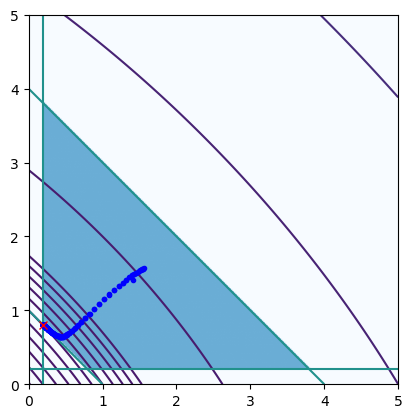

In [8]:
p1_barrier_duality = solve_and_plot(problem1, barrier_method)
plt.savefig('problem1_barrier.png')

/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/1354385314.py:38: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, ci, 0)
/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/2768127627.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


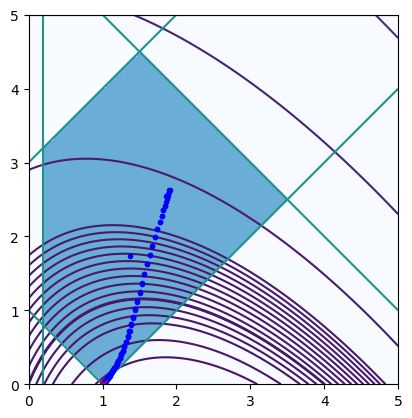

In [9]:
p2_barrier_duality = solve_and_plot(problem2, barrier_method)
plt.savefig('problem2_barrier.png')

/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/2768127627.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


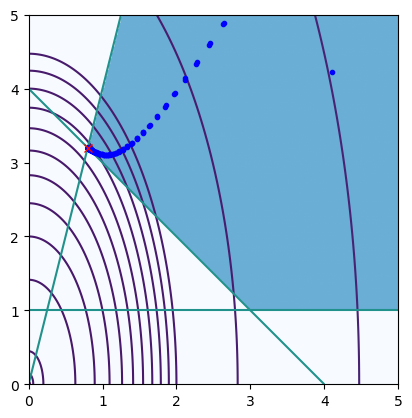

In [10]:
p3_barrier_duality = solve_and_plot(problem3, barrier_method, initial_x = np.array([[3],[3]]))
plt.savefig('problem3_barrier.png')

In [11]:
def primal_dual(problem, num_iterations = 200, learning_rate = 0.5, initial_x = None):
  mu = 3.0
  xs = []
  P, q, A, b = problem['P'], problem['q'], problem['A'], problem['b']
  x = np.ones_like(q)
  lambdas = np.ones(A.shape[0])

  if not initial_x is None:
    x = initial_x
  t=0.1
  etas =[]
  for iter in range(num_iterations):
    # find the surrogate duality gap, and set t
    fx = (A @ x - b)[:, 0]
    
    # initalizae the block matrix
    upper_left = P
    upper_right = A.T # want 2 x m
    lower_left = -np.diag(lambdas) @ A
    lower_right = -np.diag(fx)

    M = np.block([[upper_left, upper_right],
                  [lower_left, lower_right]])
  
    # find r
    def r(x, lambdas):
      r_dual = (P @ x + q)[:,0] + A.T @ lambdas
      r_cent = -np.diag(lambdas) @ fx - (1.0/t)
      return np.block([r_dual, r_cent])
    
    r_t = r(x, lambdas)

    # solve for the search direction
    delta_y = - np.linalg.inv(M) @ r_t
    delta_x = delta_y[:2].reshape(-1,1)
    delta_lambda = delta_y[2:]
    
    # update x and lambdas
    # find step size via line search
    beta = 0.8
    alpha = 0.1

    # according to boyd, find s_max
    s_max = 1.0
    for i in range(lambdas.shape[0]):
      if delta_lambda[i] < 0:
        s_max = min(s_max, -lambdas[i]/delta_lambda[i])

    # do backtracking line search on s
    s = s_max*0.99
    x_plus, lambdas_plus =  x + s*delta_x, lambdas + s*delta_lambda
    
    while np.linalg.norm(r(x_plus, lambdas_plus)) > (1-alpha*s) * np.linalg.norm(r_t):
      s *= beta
      x_plus, lambdas_plus =  x + s*delta_x, lambdas + s*delta_lambda
    
    # update x, lambda
    x = x_plus
    lambdas = lambdas_plus
    xs.append(x)

    # update t
    fx = (A @ x - b)[:, 0]
    eta = -np.dot(fx, lambdas)
    t = mu * A.shape[0]/eta
    etas.append(eta)

  return x, np.array(xs), np.array(etas)

/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/2768127627.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


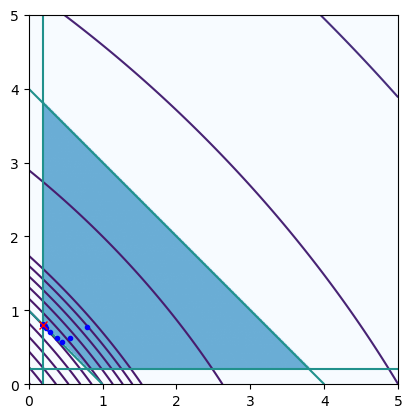

In [12]:
p1_primal_duality = solve_and_plot(problem1, primal_dual, initial_x = np.array([[1], [2]]))
plt.savefig('problem1_primaldual.png')

/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/1354385314.py:38: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, ci, 0)
/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/2768127627.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


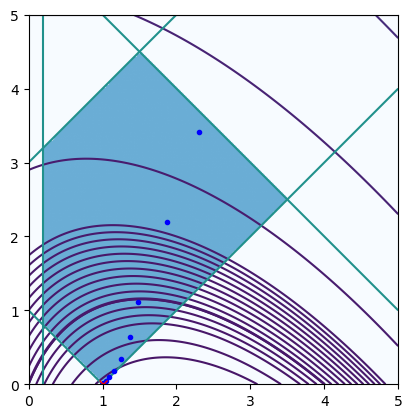

In [13]:
p2_primal_duality = solve_and_plot(problem2, primal_dual)
plt.savefig('problem2_primaldual.png')

/var/folders/7f/k_l_kg2n1j55ymckvywbzjb80000gn/T/ipykernel_34717/2768127627.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


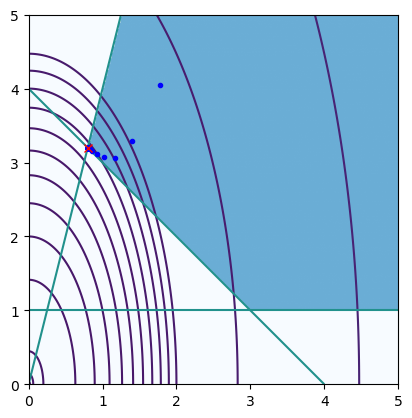

In [14]:
p3_primal_duality = solve_and_plot(problem3, primal_dual, initial_x = np.array([[3],[3]]))
plt.savefig('problem3_primaldual.png')